### Investigating Factors Affecting Heart Attack using SVM

This project aims to predict the risk of heart attack for an individual given their vital signs. This may help in the prevention of heart attacks by alerting and furthermore, it might provide more insight on the relation of different vital signs and how they may potentially contribute to heightening risk of heart attacks. Professionals in the medical field may also find some use for this by finding potential early warning signs of heart failure so that preventative treatment can begin early for those at risk.

### Import libraries and dataset

Using the Heart Attack Analysis & Prediction Dataset taken from Kaggle. 

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Prepare the dataset for training and testing

Any null values are dropped to prevent errors when transforming the data. The values are then categorized into independent variables and the dependent variable (or the output). The data is then split into the training and the testing sets; 70% of the data will be used for training the model.

In [10]:
data = data.dropna()

X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values                                              # independent variables
y = data.iloc[:,13].values                                                                          # dependent variable

# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=202006914)  

### Normalize the data
StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1. This is to ensure the values have a unit norm and minimizes the chances of suboptimal results caused by larger values. This also improves the rate of convergence and the model's performance.

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train and test the model 

In [12]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.8131868131868132

After training and testing the model, we can see that it currently has an accuracy score of 81.32%. This can be improved later on.

### Evaluating the model

### Generate the confusion matrix

Text(113.9222222222222, 0.5, 'true value')

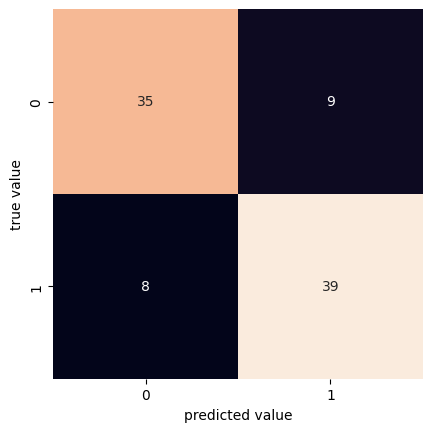

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

The confusion matrix shows that the model makes relatively equal mistakes for both the at-risk and low-risk results.

### Print the classification report

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        44
           1       0.81      0.83      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Improve the model by hyperparameter tuning. Use GridSearchCV.

In [15]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 
              'gamma': [1, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 
                        0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.001, 0.00001, 0.000001]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 161 candidates, totalling 805 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.558 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.558 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.548 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.548 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.571 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.791 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.721 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.09;, score=0.791 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
                                   0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006,
                                   0.005, 0.004, 0.003, 0.002, 0.001, 0.001,
                                   1e-05, 1e-06]},
             verbose=3)

### Show the best parameters found and use them to generate the predictions.

In [16]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
accuracy_score(y_test, grid_predictions)

{'C': 100, 'gamma': 0.002}


0.8571428571428571

After using trial and error with GridSearch, the parameters with the best results were a penalty parameter (C) value of 100 and a gamma value of 0.002. Using these values improved the model from its previous accuracy score of 81.32% to 85.71%.

### Display the confusion matrix 

Text(113.9222222222222, 0.5, 'true value')

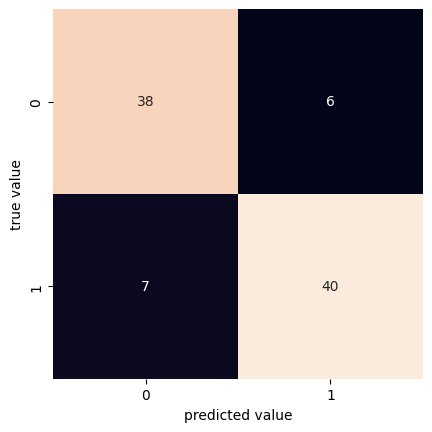

In [17]:
mat = confusion_matrix(y_test,grid_predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value') 

### Display the classification report

In [18]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.87      0.85      0.86        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



Since we are dealing with patients at risk for heart attack, it's crucial that the recall scores are as high as possible since it shows how many Actual Positives it labelled correctly (in this case, it would be bad to label an at-risk patient to as a low-risk oatient). The recall score for 0 improved from 0.80 to 0.86 and the recall score for 1 from 0.83 to 0.85.

### Predictor

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

parameters = [[40,1,0,120,229,0,0,129,1,2.6,1,2,3]]

x = sc.transform(parameters)
y = grid.predict(x)
print(y)

[0]


# Results

To evaluate the created model, it will be compared with another analysis of the Heart Attack Analysis and Prediction Dataset by Ishant Garg Ml (retrieved from https://www.kaggle.com/code/ishantgargml/heart-attack-analysis-and-prediction).

Ml's analysis used logistic regression, linear SVM, kernel SVM, naive Bayes, decision tree, random forest, K-Nearest Neighbors, and XGBoost to create models for the data. 

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart.csv')

data = data.drop_duplicates()

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_sample, y_sample = train_test_split(data, train_size=0.8, random_state=42, stratify = y)

X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
X_test = y_sample.iloc[:,:-1].values
y_test = y_sample.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

ksvm = SVC(kernel = 'rbf')
ksvm.fit(X_train, y_train)
y_pred_ksvm = ksvm.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#### Classification Reports:
Logistic Regression

In [26]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



Linear SVM

In [29]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



Kernel SVM

In [28]:
print(classification_report(y_test, y_pred_ksvm))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



K-Nearest Neighbors

In [30]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



Naive Bayes

In [31]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



Decision Tree

In [32]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Random Forest

In [33]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



XG Boost

In [34]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [35]:
df = pd.DataFrame({
    'Model Name': ['LogisticRegression', 'Linear SVM', 'Kernel SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy_score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_ksvm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_xgb)]
})
df

,Model Name,Accuracy_score
0,LogisticRegression,0.786885
1,Linear SVM,0.836066
2,Kernel SVM,0.836066
3,KNN,0.803279
4,Naive Bayes,0.819672
5,Decision Tree,0.754098
6,Random Forest,0.803279
7,XGBoost,0.803279


As seen from the table above, out of all the models created by Ml, the Linear SVM and the Kernel SVM were the best performing models with accuracy scores of 83.6% which is still lower than the model we created (with an accuracy of 85.71%).